# <p style="background-color:darkviolet;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Logistic Regression (Best Treshold) Diabetes</b></p>

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

Bu veri seti, Arizona'da yaşayan Pima Kızılderili kadınları üzerinde yapılan diyabet çalışmalarından elde edilen verileri içerir.

Veri seti aşağıdaki özellikleri içermektedir:

   1. **Pregnancies:** Hamilelik sayısı.<br>
   2. **Glucose:** Oral glikoz tolerans testinde 2 saatlik plazma glikoz konsantrasyonu.<br>
   3. **Blood Pressure:** Kan basıncı (mm Hg).<br>
   4. **Skin Thickness:** Triceps deri kıvrım kalınlığı (mm).<br>
   5. **Insulin:** 2 saatlik serum insülini (mu U/ml).<br>
   6. **BMI:** Vücut kitle indeksi (ağırlık kg/(boy m)^2).<br>
   7. **Diabetes Pedigree Function:** Diyabet soyağacı fonksiyonu, aile geçmişine dayalı diyabet olasılığını belirleyen bir fonksiyon.<br>
   8. **Age:** Yaş (yıl).<br>
   9. **Outcome:** Sınıf etiketi (0 veya 1), kişinin diyabet hastası olup olmadığını gösterir. 1 diyabet hastası olduğunu, 0 ise olmadığını belirtir.<br>

Bu veri seti, makine öğrenimi algoritmalarını eğitmek ve diyabet hastalığının tahmin edilmesi gibi ikili sınıflandırma problemlerinde kullanılmak üzere yaygın bir şekilde kullanılır. Veri seti, özellikle veri önişleme, özellik mühendisliği ve sınıflandırma algoritmalarının performanslarının karşılaştırılması gibi konularda kullanılır.

Veri setinin kullanıldığı tipik uygulamalar arasında, hangi hasta profillerinin diyabet riski taşıdığını anlamak, hangi özelliklerin diyabet olasılığını artırdığını belirlemek ve diyabet teşhisinin otomatik olarak konmasına yardımcı olacak tahmin modelleri geliştirmek bulunur.

Veri setinin doğası gereği, bazı özelliklerin eksik olabileceği veya dengesiz bir sınıf dağılımına sahip olabileceği gibi zorluklar içerebileceğini unutmamak önemlidir. Bu tür zorluklar, veri temizleme, eksik veri imputasyonu, dengesiz veri setlerini ele alma ve model doğrulama teknikleri gibi makine öğrenimi konularını derinlemesine inceleme fırsatı sunar.

In [45]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [46]:
df.shape

(768, 9)

## Exploratory Data Analiysis and Viaualization (EDA & Data Viz)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [49]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [50]:
df.Outcome.value_counts(normalize = True)

Outcome
0   0.651
1   0.349
Name: proportion, dtype: float64

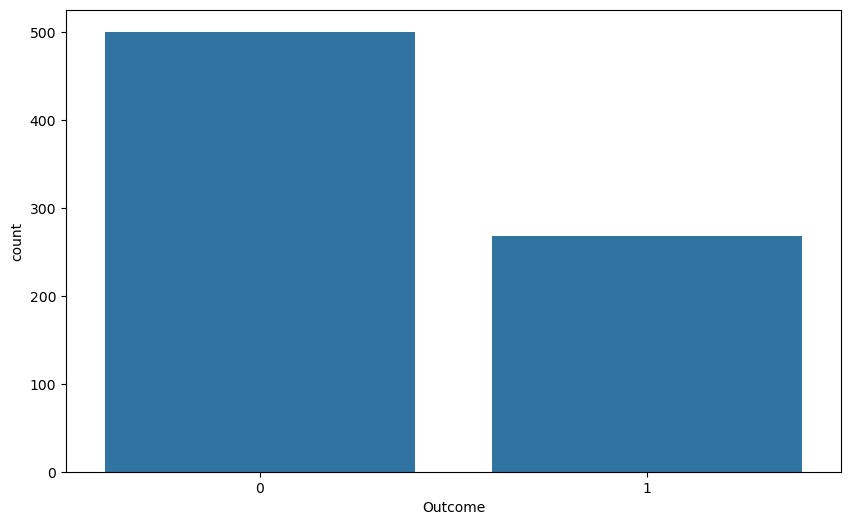

In [51]:
sns.countplot(data = df, x = "Outcome");

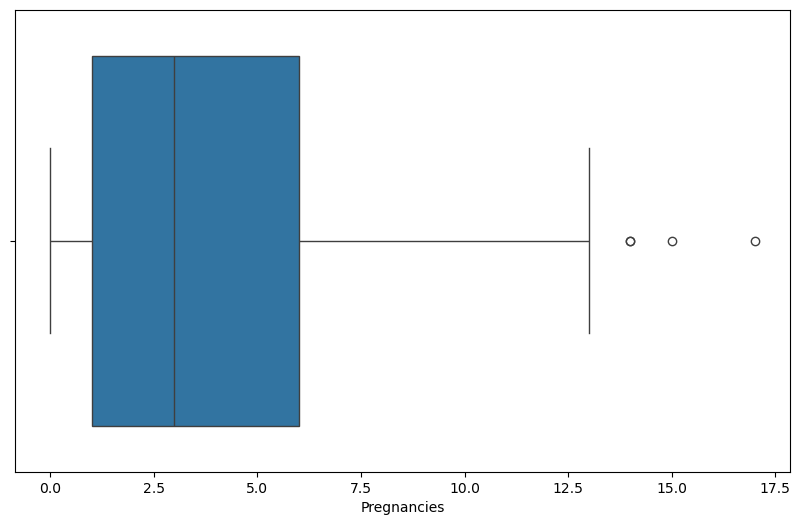

In [52]:
sns.boxplot(data =df, x="Pregnancies");

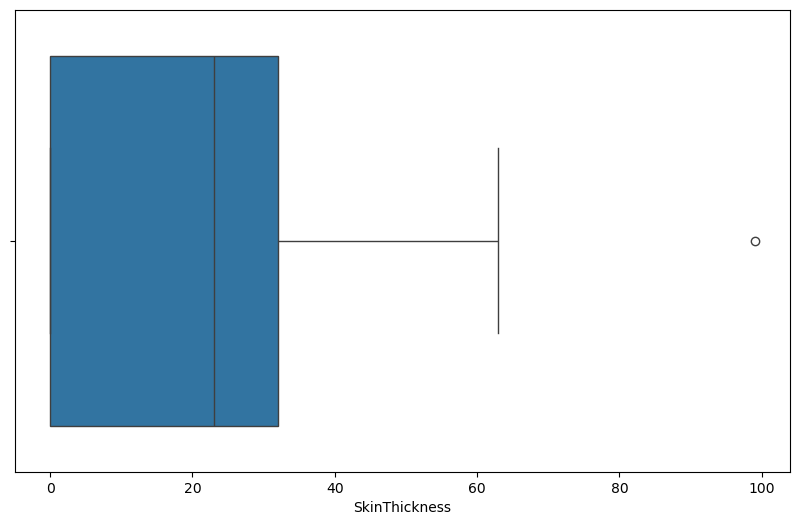

In [53]:
sns.boxplot(data =df, x="SkinThickness");

In [54]:
df = df[df.SkinThickness<70]

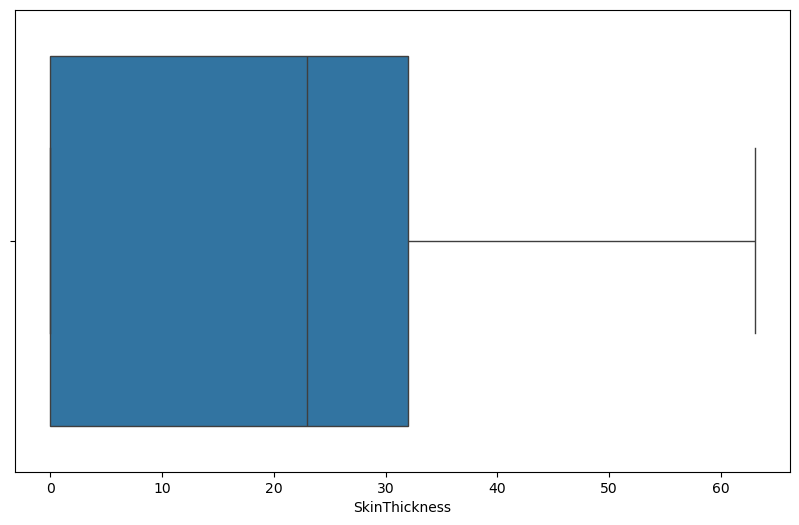

In [55]:
sns.boxplot(data =df, x="SkinThickness");

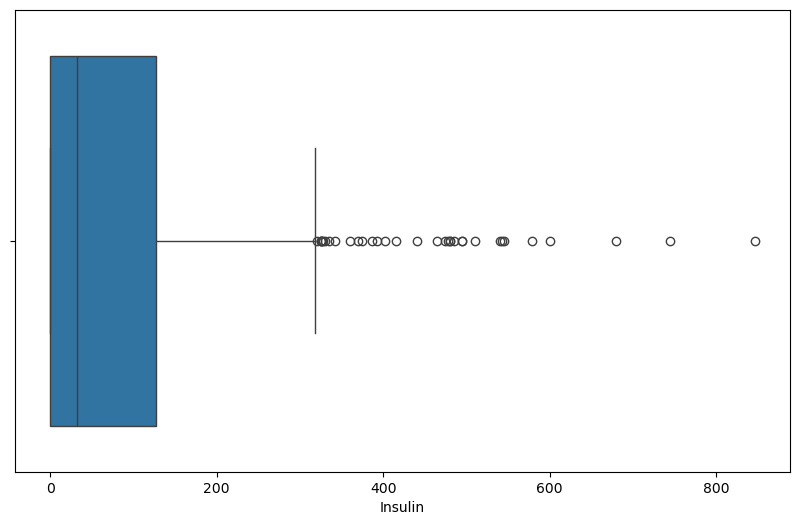

In [56]:
sns.boxplot(data =df, x="Insulin");

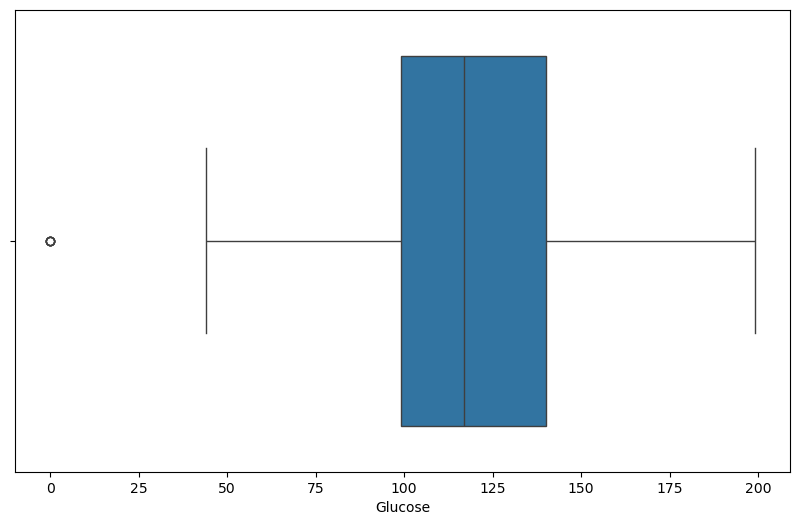

In [57]:
sns.boxplot(data =df, x="Glucose");

In [58]:
df = df[df.Glucose>0]

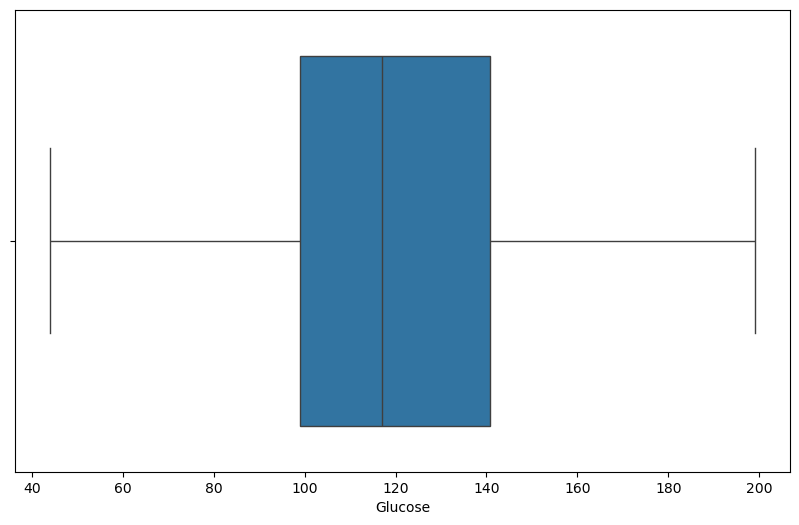

In [59]:
sns.boxplot(data =df, x="Glucose");

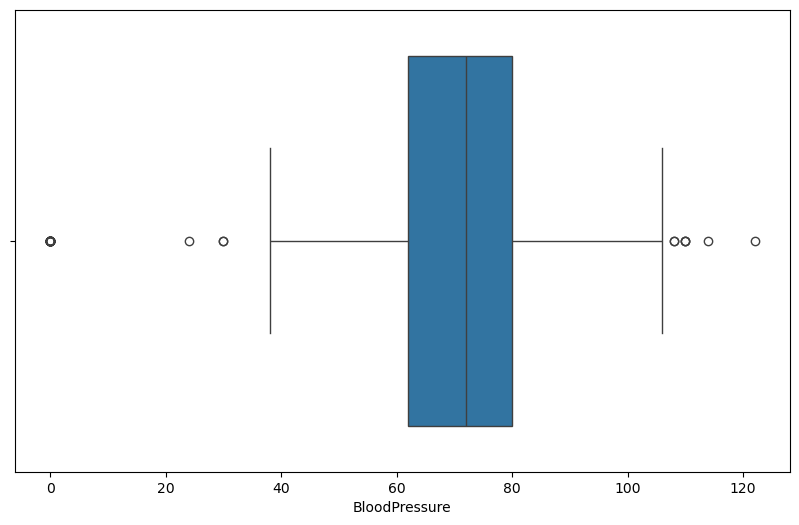

In [60]:
sns.boxplot(data =df, x="BloodPressure");

In [61]:
df = df[df.BloodPressure>35]

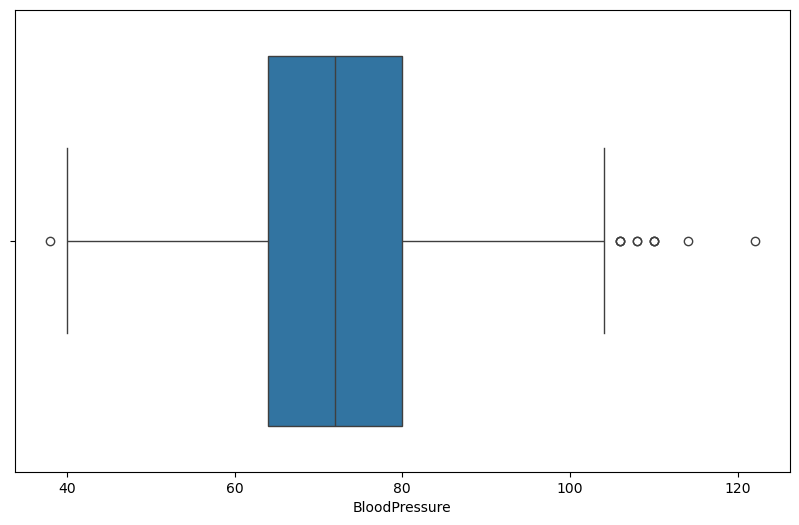

In [62]:
sns.boxplot(data =df, x="BloodPressure");

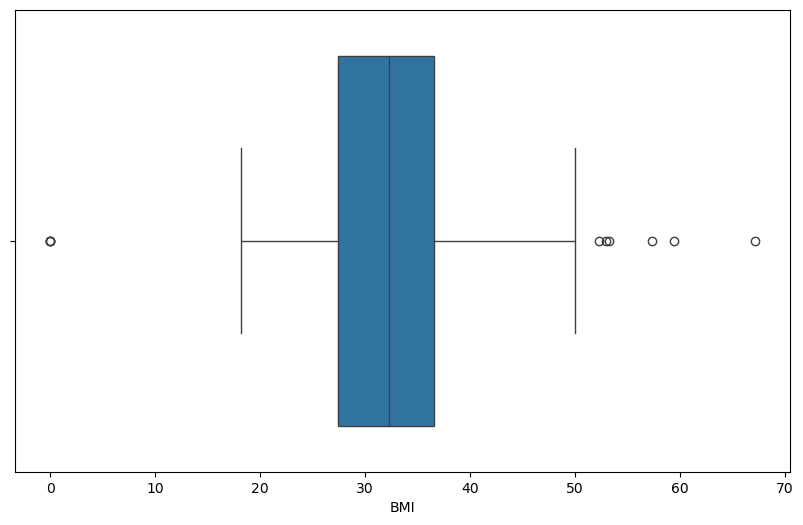

In [63]:
sns.boxplot(data =df, x="BMI");

In [64]:
df = df[df.BMI>0]

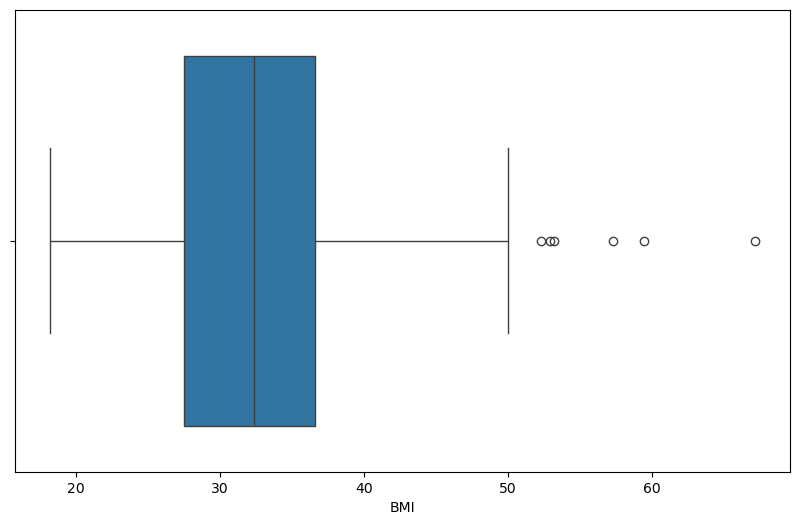

In [65]:
sns.boxplot(data =df, x="BMI");

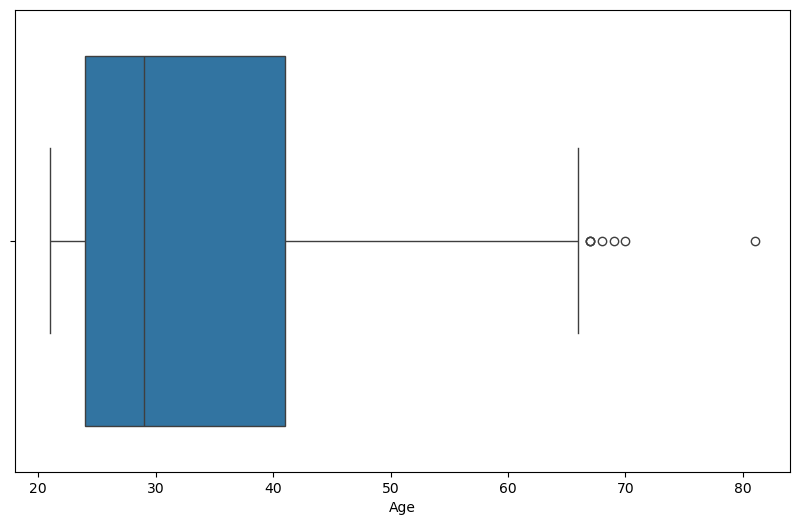

In [66]:
sns.boxplot(data =df, x="Age");

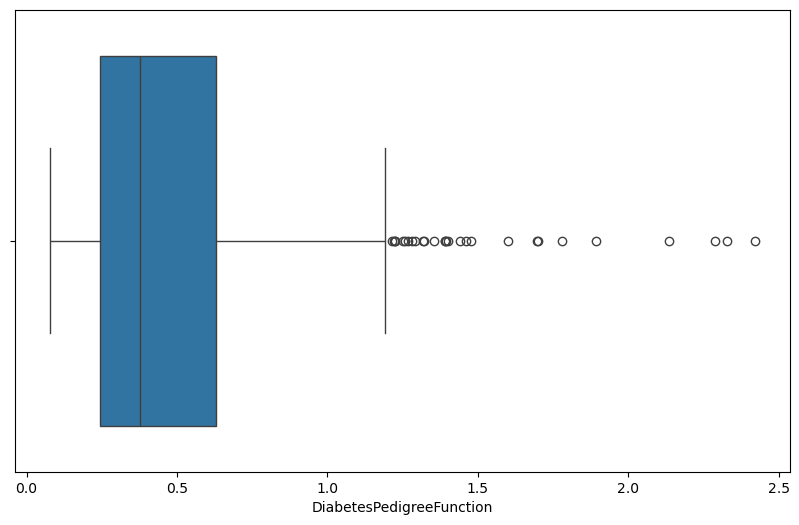

In [67]:
sns.boxplot(data =df, x="DiabetesPedigreeFunction");

In [68]:
df.shape

(720, 9)

In [69]:
df.Outcome.value_counts()

Outcome
0    473
1    247
Name: count, dtype: int64

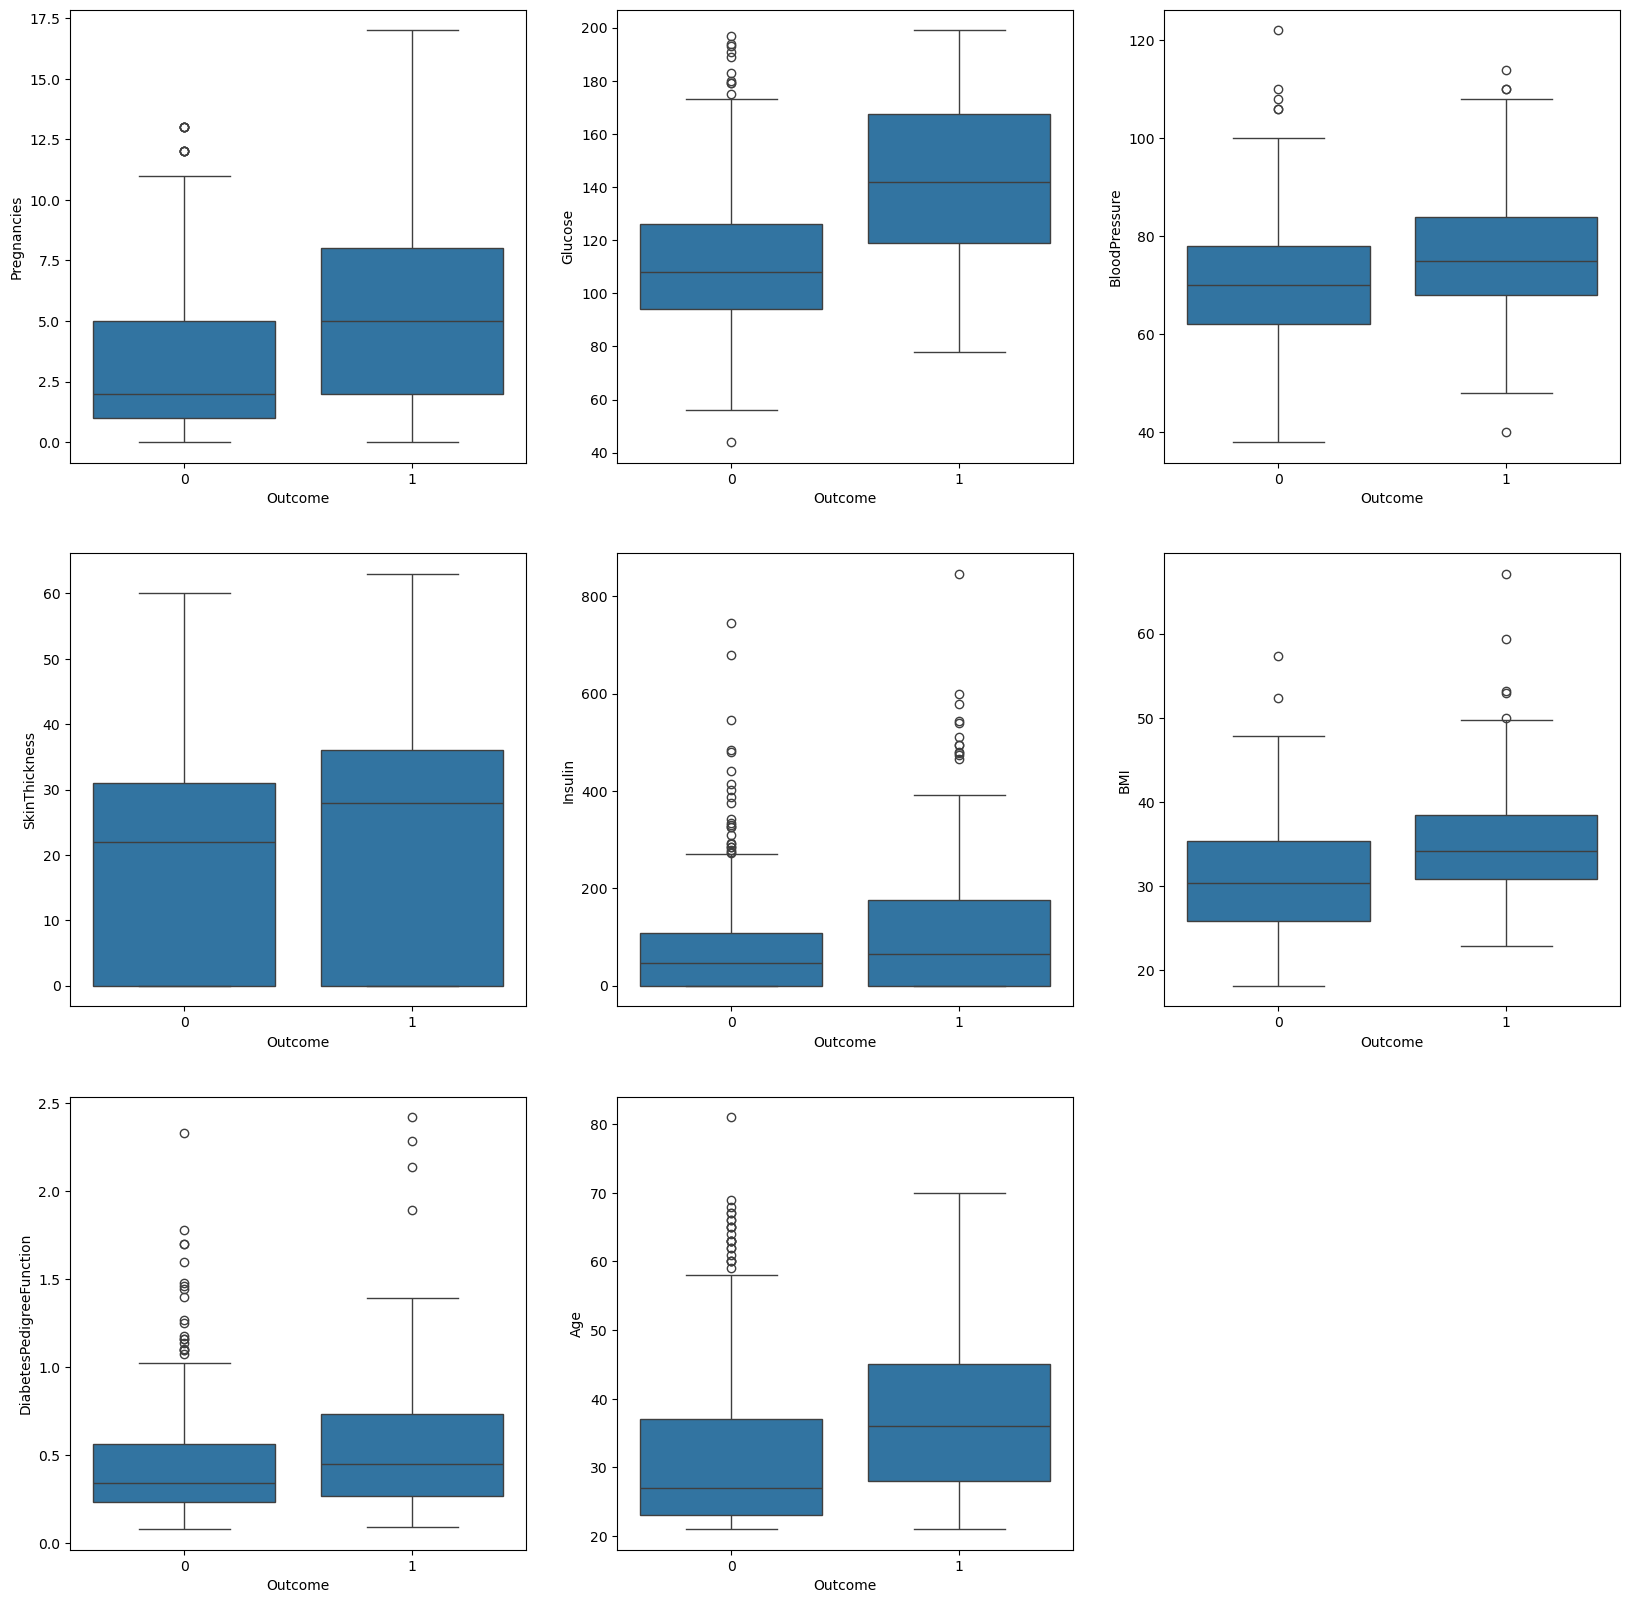

In [70]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)
plt.show()

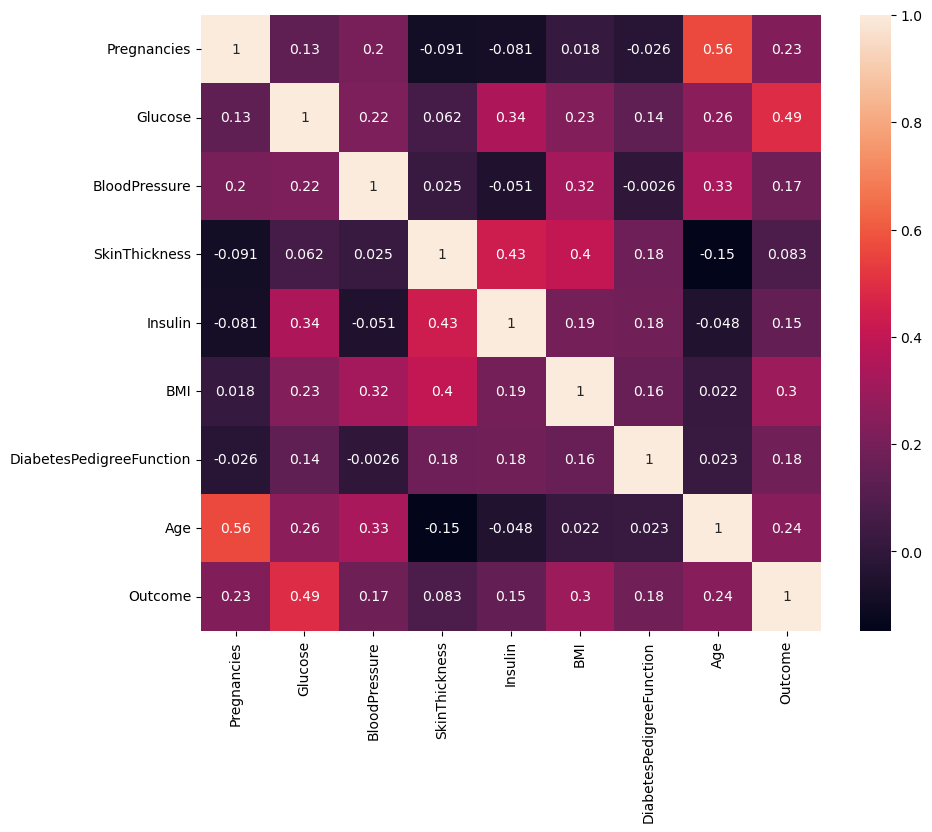

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True);

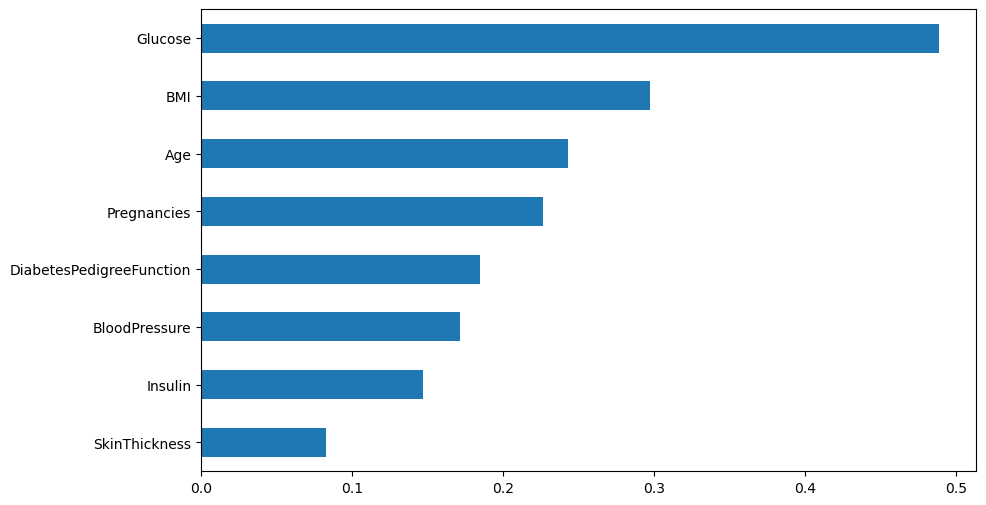

In [72]:
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh();

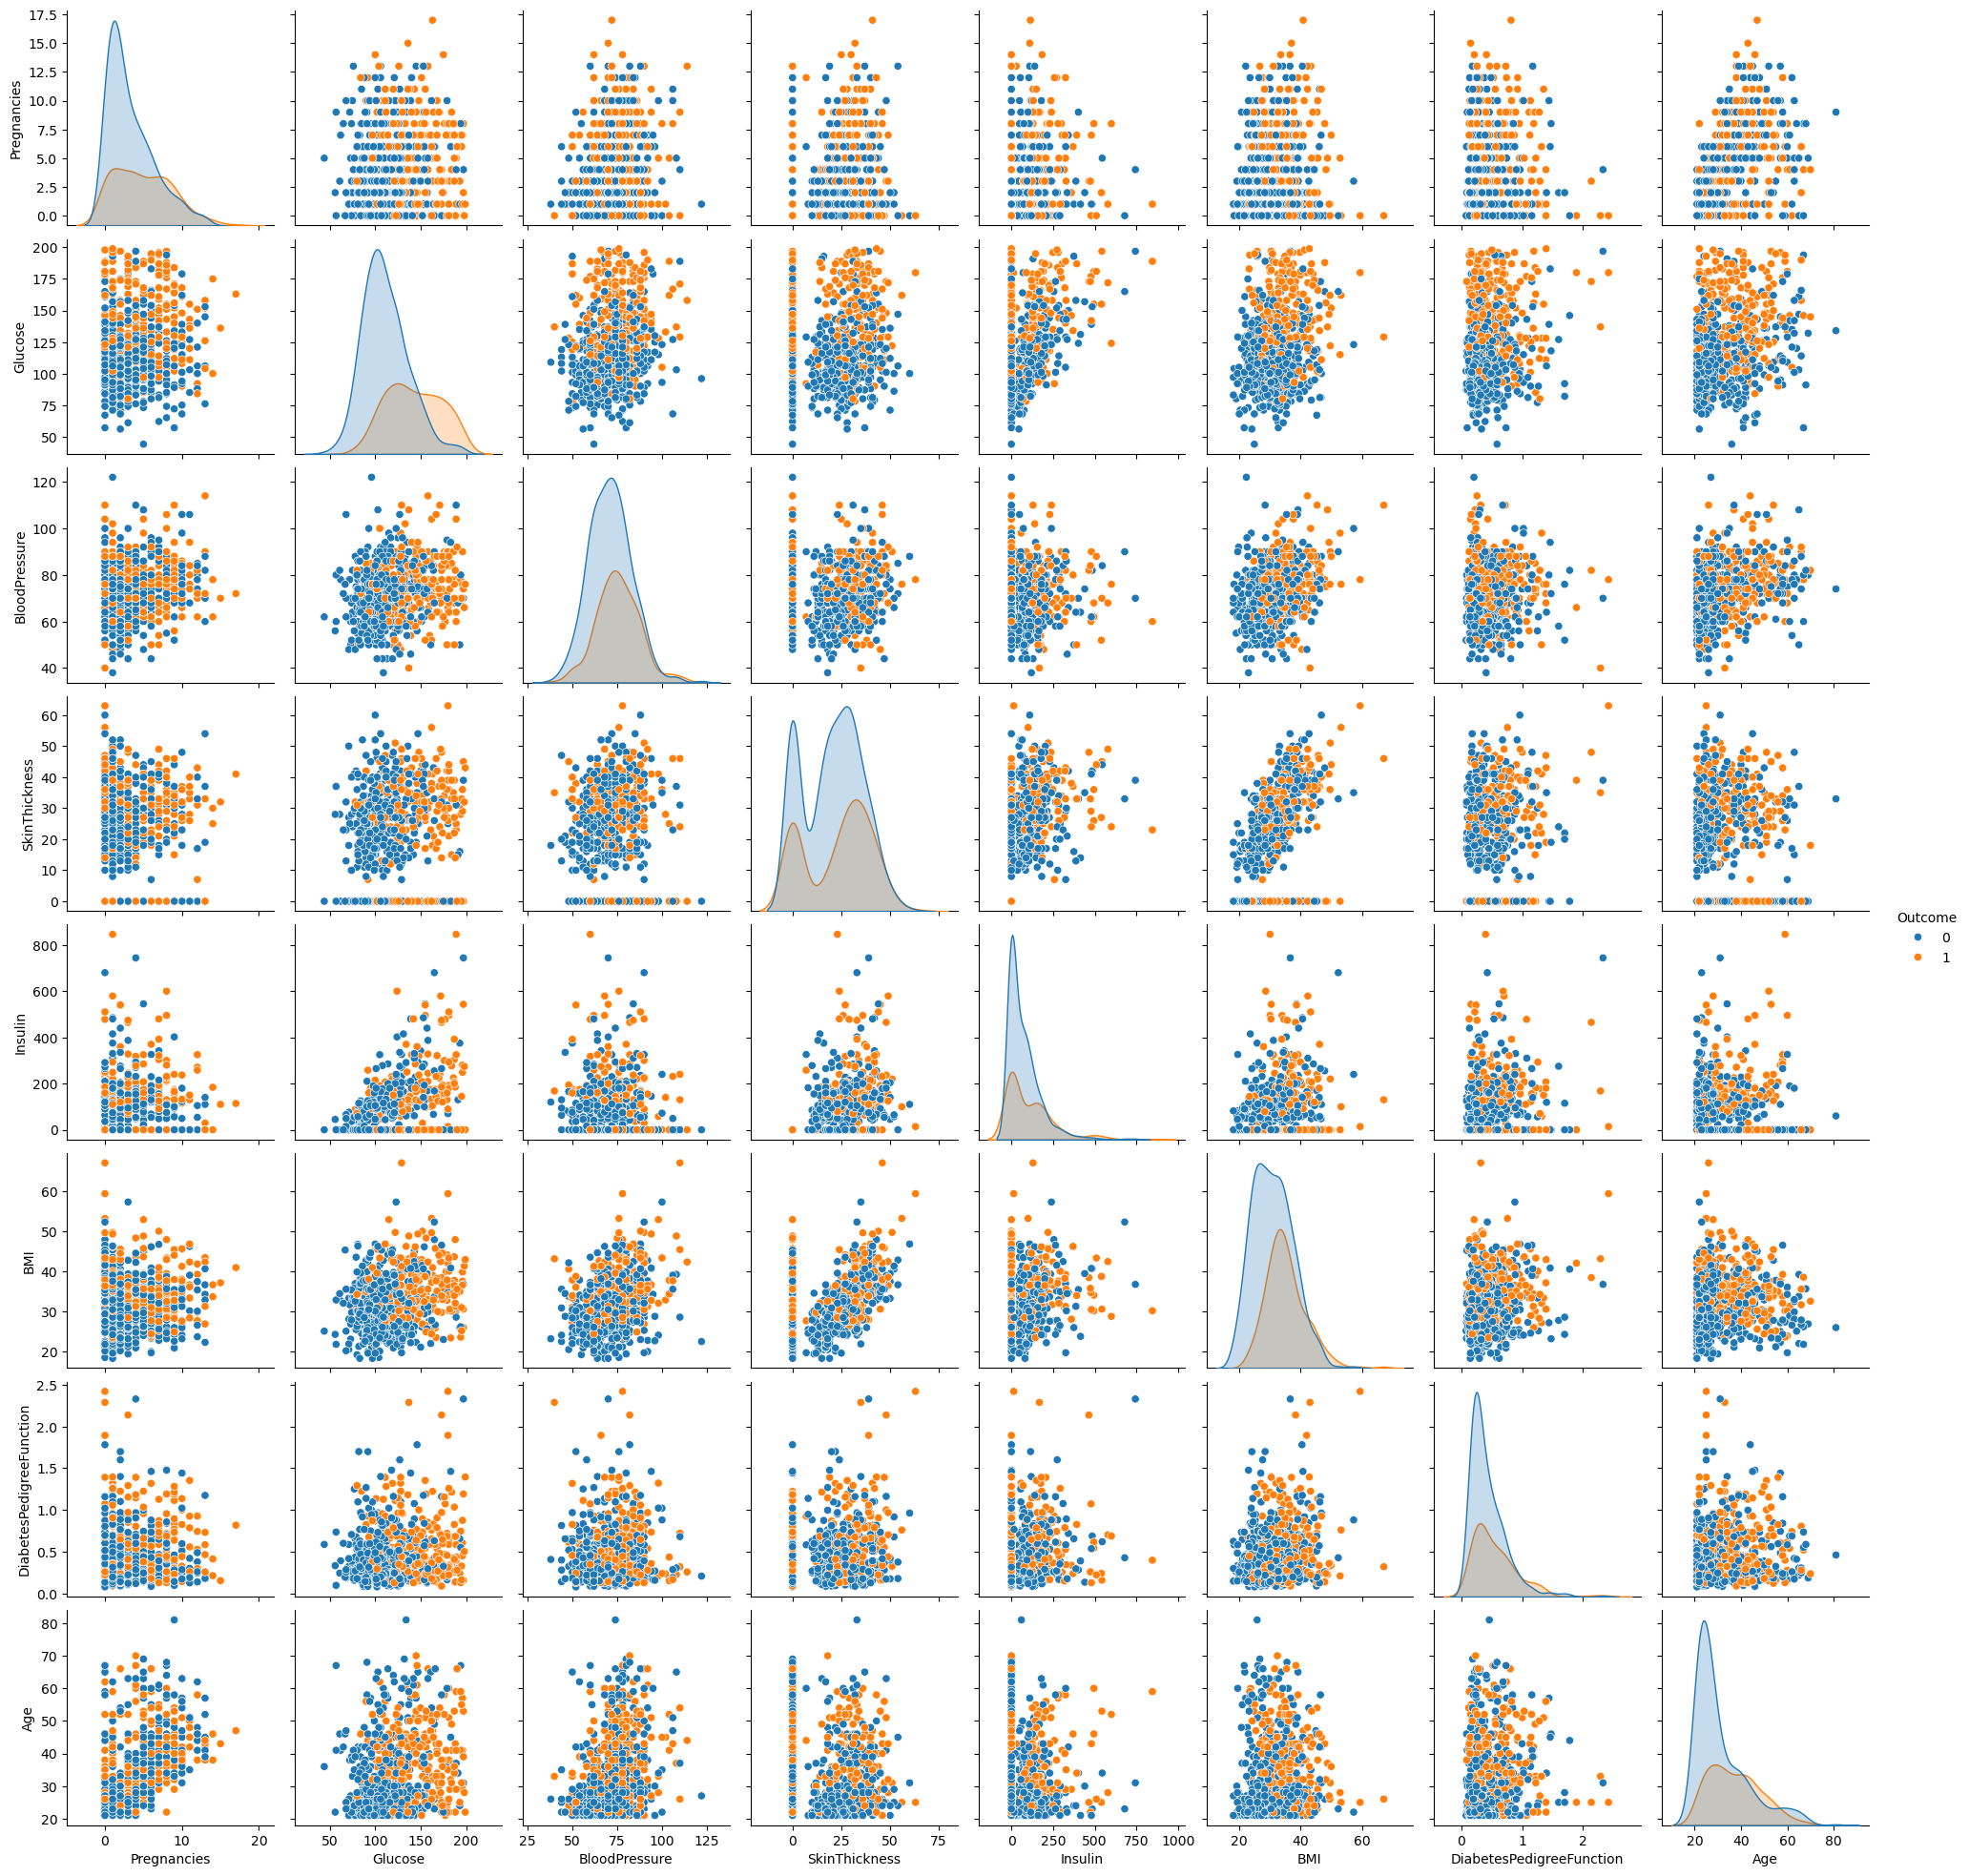

In [73]:
sns.pairplot(df, hue = "Outcome");

## Train | Test Split

### Target ve Features Ayır

In [74]:
X = df.drop(["Outcome"], axis = 1)
y = df["Outcome"]

### Train | Test Split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    stratify=y, 
                                                    random_state = 42)

## Scaling

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()

In [79]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

## Modelling

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
log_model = LogisticRegression()

In [82]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [83]:
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [84]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
90,1,80,55,0,0,19.100,0.258,21,0,0,0.018
737,8,65,72,23,0,32.000,0.600,42,0,0,0.110
48,7,103,66,32,0,39.100,0.344,31,1,0,0.401
346,1,139,46,19,83,28.700,0.654,22,0,0,0.356
512,9,91,68,0,0,24.200,0.200,58,0,0,0.119
99,1,122,90,51,220,49.700,0.325,31,1,0,0.461
354,3,90,78,0,0,42.700,0.559,21,0,0,0.247
94,2,142,82,18,64,24.700,0.761,21,0,0,0.261
82,7,83,78,26,71,29.300,0.767,36,0,0,0.130
233,4,122,68,0,0,35.000,0.394,29,0,0,0.369


## Model Performance on Calssification Tasks

**Doğruluk (Accuracy)**

* **Ne Zaman Kullanılır:** Dengeli veri setlerinde, yani her sınıfın yaklaşık eşit sayıda örneğe sahip olduğu durumlarda kullanılır.
* **Açıklama:** Doğruluk, modelin toplam tahminlerinin ne kadarının doğru olduğunu gösterir. Ancak, dengesiz veri setlerinde yanıltıcı olabilir çünkü model sadece çoğunluk sınıfını doğru tahmin ederek yüksek doğruluk elde edebilir.

**Hassasiyet (Precision) ve Duyarlılık (Recall)**

* **Ne Zaman Kullanılır:** Özellikle bir sınıfın (genellikle pozitif sınıf) doğru tahmin edilmesinin önemli olduğu durumlarda kullanılır.
* **Açıklama:** Hassasiyet, pozitif olarak tahmin edilenler arasında gerçekten pozitif olanların oranını; duyarlılık ise gerçekten pozitif olan örneklerin doğru tahmin edilme oranını gösterir.

**F1 Skoru**

* **Ne Zaman Kullanılır:** Hassasiyet ve duyarlılığın her ikisinin de önemli olduğu durumlarda, özellikle dengesiz veri setlerinde kullanılır.
* **Açıklama:** F1 skoru, hassasiyet ve duyarlılığın harmonik ortalamasıdır ve her iki metriği dengeler. Dengesiz veri setlerinde, azınlık sınıfının göz ardı edilmesini önlemek için kullanılır.

**Macro Average (Makro Ortalama)**

* **Ne Zaman Kullanılır:** Dengesiz veri setlerinde, her sınıfın eşit derecede önemli olduğu durumlarda kullanılır.
* **Açıklama:** Her sınıf için hesaplanan metriklerin (örneğin, F1 skoru) basit aritmetik ortalaması alınır. Her sınıf eşit ağırlıkta değerlendirilir, böylece azınlık sınıflarının performansı da dikkate alınır.

**Weighted Average (Ağırlıklı Ortalama)**

* **Ne Zaman Kullanılır:** Her sınıfın veri setindeki temsili oranına göre ağırlıklandırılmasının önemli olduğu durumlarda kullanılır.
* **Açıklama:** Her sınıf için hesaplanan metrikler, o sınıfın veri setindeki oranına göre ağırlıklandırılır. Bu, çoğunluk sınıfının model performansı üzerinde daha büyük etkiye sahip olmasını sağlar.

Her bir metrik, modelin farklı yönlerini vurgular ve hangi metriğin kullanılacağı, problemin doğası ve özel ihtiyaçlarınıza bağlıdır. Özellikle dengesiz veri setlerinde, modelin her sınıf üzerindeki performansını anlamak için birden fazla metriği kullanmak ve karşılaştırmak yararlı olabilir.

## Slack Sorusu
Neden macro ya bakıyoruz neden accuracy e bakıyoruz.

## Cevap

* Dengesiz veri setleri, bazı sınıfların diğerlerine göre çok daha fazla sample a sahip olduğu durumlardır. 

* Örnek verecek olursak eğer, bir hastalığı teşhis eden bir modelde, hastalığa sahip olmayan (negatif) örneklerin sayısı, hastalığa sahip (pozitif) örneklerden çok daha fazla olabilir. Bu durumda, modelin çoğunluk sınıfını (negatif örnekler) öğrenmesi ve azınlık sınıfını (pozitif örnekler) göz ardı etmesi riski vardır.

* Bu noktada "macro" metriklere bakmak gerekir. "Macro" metrikler nasıl çalışır ve neden ona bakılır derseniz? "Macro" her sınıf için ayrı ayrı hesaplanan performans metriklerinin basit bir şekilde ortalamasını alır. Örneğin, "macro F1 skoru", her sınıf için ayrı ayrı hesaplanan F1 skorlarının aritmetik ortalamasıdır. Bu durum, azınlık sınıfının performansını göz ardı etmeyi zorlaştırır ve modelin tüm sınıfları dengeli bir şekilde öğrenmesini sağlar.

* Acccuracy (doğruluk) metriği ise genellikle dengesiz veri setlerinde yanıltıcı olabilir. Eğer bir model, çoğunluk sınıfını sürekli doğru tahmin ederse, yüksek bir doğruluk skoru elde edebilir. 

* Bu durum ise  modelin azınlık sınıfı üzerinde iyi performans gösterdiği anlamına gelmez. Dolayısıyla, dengesiz veri setlerinde doğruluk yerine "macro" metrikler tercih edilir çünkü bu metrikler her sınıfın performansını ayrı ayrı değerlendirir ve modelin tüm sınıfları üzerindeki genel performansına daha iyi bir bakış açısı sunar.

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [87]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate

In [88]:
from sklearn.model_selection import cross_validate

In [89]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["precision", 
                                                                   "recall",
                                                                   "f1", 
                                                                   "accuracy"], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))

In [90]:
df_scores.mean()[2:]

test_precision   0.711
test_recall      0.546
test_f1          0.616
test_accuracy    0.766
dtype: float64

## Cross Validate for "0" class

In [91]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [92]:
f1_0 = make_scorer(f1_score, pos_label=0)
precision_0 = make_scorer(precision_score, pos_label=0)
recall_0 = make_scorer(recall_score, pos_label=0)

In [93]:
model = LogisticRegression() #model sıfırlamak

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"precision_0":precision_0, 
                                                                   "recall_0":recall_0,
                                                                   "f1_0":f1_0}, cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))

In [94]:
df_scores.mean()[2:]

test_precision_0   0.787
test_recall_0      0.881
test_f1_0          0.831
dtype: float64

## GridSearchCV

$$
w_j = \frac{n}{k \times n_j}
$$

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 10) #katsayı için logspace alınarak değerler verilmesi öneriliyor
class_weight = ["balanced", None]
solver = ["lbfgs", "liblinear", "sag", "saga"]


param_grid = {"penalty": penalty,
             "C": C,
             "class_weight":class_weight,
             "solver": solver}

grid_model = GridSearchCV(estimator = model, 
                          param_grid = param_grid, 
                          cv = 10, scoring = "recall", 
                          n_jobs = -1)

In [97]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03, 4.64158883e+03,
       2.15443469e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [98]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [99]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[76 19]
 [13 36]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        95
           1       0.65      0.73      0.69        49

    accuracy                           0.78       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.79      0.78      0.78       144


Train_Set
[[288  90]
 [ 49 149]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       378
           1       0.62      0.75      0.68       198

    accuracy                           0.76       576
   macro avg       0.74      0.76      0.74       576
weighted avg       0.78      0.76      0.76       576



Dengesiz veri setlerinde model performansını değerlendirmek için makro ortalama skorlar genellikle tercih edilir. Makro ortalama, her sınıf için hesaplanan performans metriklerinin basit ortalamasıdır ve her sınıfı eşit ağırlıkta ele alır. Bu nedenle, azınlık sınıfının performansını da büyük çoğunluk sınıfının performansı kadar önemser.

Gerçek dünyada özellikle dengesiz veri setleri vardır ve bu veri setlerinde de azınlık sınıfı genellikle odak noktadadır. Çünkü bu sınıf, örneğin dolandırıcılık tespiti veya hastalık teşhisi gibi durumlarda hedef class tır ve model bunu tahmin etmeye odaklıdır. **Eğer model, çoğunluk sınıfını çok iyi tahmin ederken azınlık sınıfını yeterince iyi tahmin edemiyorsa, genel doğruluk (accuracy) yüksek olabilir ama bu, modelin gerçekten iyi performans gösterdiği anlamına gelmez. Makro ortalama, bu tür yanıltıcı yüksek doğruluk skorlarının önüne geçmek için kullanılır.**

Makro ortalama precision, recall ve F1 skoru gibi metrikler için hesaplanabilir:

* Makro Precision: Her bir sınıf için ayrı ayrı hesaplanan precision değerlerinin basit ortalaması alınır.
* Makro Recall: Her bir sınıf için ayrı ayrı hesaplanan recall değerlerinin basit ortalaması alınır.
* Makro F1 Skoru: Her bir sınıf için ayrı ayrı hesaplanan F1 skorlarının basit ortalaması alınır.

Bunun yanı sıra, dengesiz veri setlerinde model performansını değerlendirirken ağırlıklı ortalama (weighted average) veya mikro ortalama (micro average) gibi diğer metrikler de kullanılabilir. Bu metrikler, sınıfların örnek sayısına göre ağırlıklandırılmasını içerir ve bazı durumlarda faydalı olabilir. Ancak, **genel olarak, makro ortalama sınıflar arası dengesizliği dikkate aldığı için dengesiz veri setlerinde tercih edilen bir metriktir.**


**Her bir metrik farklı bir yönü vurgular: precision yanlış pozitiflerin maliyetini, recall ise yanlış negatiflerin maliyetini yansıtır. F1 skoru ise bu iki metriği dengeler. Bu yüzden, sınıflandırma problemlerinde genel bir performans resmi elde etmek için birden fazla metriği incelemek yararlıdır.**

## ÖNEMLİ NOT:

### Eğer data setimiz bir teşhis gibi azınlık sınıfın 1 olduğu olduğu bir durumda ise ve biz bu azınlık sınıfını tahmin etmek üzere çalışıyorsak bu durumda farklı bir bakış açısı olması gerekir.

### Eğer dengesiz bir veri setinde, özellikle bir kanser gibi bir teşhis veri setinde, belirli bir sınıf (örneğin, kanser olanlar) sizin için özellikle önemliyse ve bu sınıf azınlık sınıfı ise, o sınıfın performans metriklerine odaklanmanız daha uygun olacaktır. Bu durumda, genel bir "macro F1" skorundan ziyade, özellikle o sınıfın F1 skoru ve recall değerine bakmak daha anlamlı olacaktır. Aşağıda buna dair nedenleri sıraladım.

#### Recall:

* Kanser teşhisinde, yanlış negatiflerin (hastalığı olan ama sağlıklı olarak sınıflandırılan vakalar) maliyeti çok yüksektir (insan hayatı). Bu yüzden, modelin gerçekten kanser olan vakaları ne kadar iyi tespit ettiğini gösteren recall metriğine özellikle dikkat etmek gerekmektedir.
* Yüksek bir recall değeri, modelin kanserli vakaları kaçırma ihtimalinin düşük olduğunu gösterir, ki bu teşhis amaçlı modeller için kritik bir özelliktir.

#### F1 Score:

* F1 skoru, precision ve recall'un dengesini sağlar. Kanser teşhisi gibi kritik uygulamalarda, hem yanlış pozitifleri (FP)(sağlıklı bireyleri kanserli olarak sınıflandırma) hem de yanlış negatifleri (FN) (kanserli bireyleri sağlıklı olarak sınıflandırma) minimize etmek önemlidir.
* Bu sınıf için özel olarak hesaplanan F1 skoru, her iki tip hatanın dengesini gösterir ve modelin genel hassasiyetini değerlendirir.
* Macro F1 skoru, tüm sınıfların performansını eşit olarak değerlendirir, bu yüzden eğer odak noktanız belirli bir sınıf ise (bu örnekte bahsettiğimi gibi kanser olanlar), bu sınıfa özel F1 skoru ve recall değerleri daha faydalı bilgiler sunacaktır. Eğer modelin sadece kanser teşhisi yapma yeteneğini değerlendirmek istiyorsanız, o sınıfa ait F1 ve recall metriklerine odaklanmanız, modelinizin o amaçlanan tahmin için ne kadar uygun olduğunu anlamanıza daha fazla yardımcı olacaktır.

## ROC (Receiver Operating Charecteristic) Curve and AUC (Area Under Curve)

In [100]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score

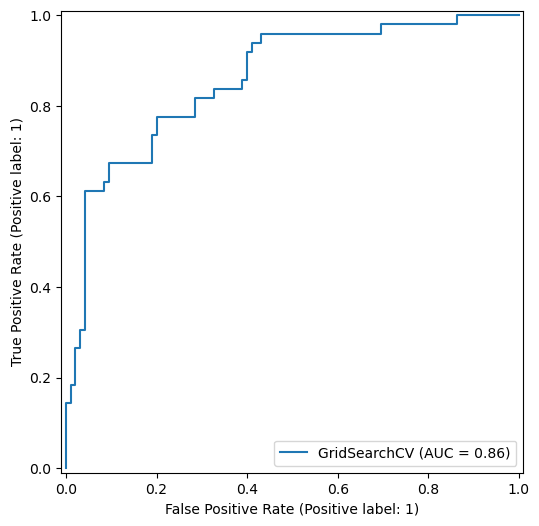

In [101]:
RocCurveDisplay.from_estimator(grid_model, X_test_scaled, y_test)

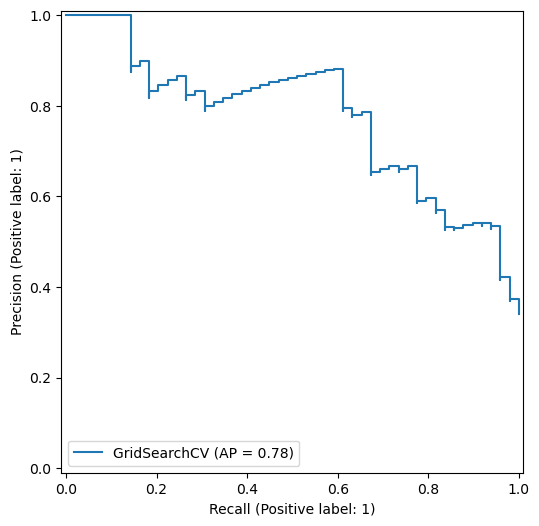

In [102]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test_scaled, y_test)

## Finding Best Treshold for max RECALL score

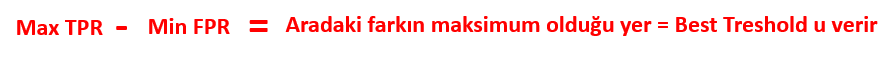

In [103]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:, 1])

0.8353107797552242

In [104]:
fp_rate, tp_rate, tresholds = roc_curve(y_train, y_pred_proba[:, 1])

In [105]:
fp_tp_th = fp_rate, tp_rate, tresholds = roc_curve(y_train, y_pred_proba[:, 1]) 
df_fp_tp_th = pd.DataFrame(fp_tp_th)
df_fp_tp_th

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,0.000,0.000,0.003,0.003,0.005,0.005,0.008,0.008,0.011,0.011,...,0.648,0.669,0.669,0.683,0.683,0.688,0.688,0.696,0.696,1.000
1,0.000,0.005,0.005,0.010,0.010,0.030,0.030,0.066,0.066,0.131,...,0.980,0.980,0.985,0.985,0.990,0.990,0.995,0.995,1.000,1.000
2,inf,0.988,0.977,0.970,0.964,0.954,0.949,0.929,0.928,0.908,...,0.244,0.235,0.235,0.232,0.231,0.231,0.228,0.227,0.224,0.045


In [106]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_treshold = tresholds[optimal_idx]
optimal_treshold

0.48646450022029036

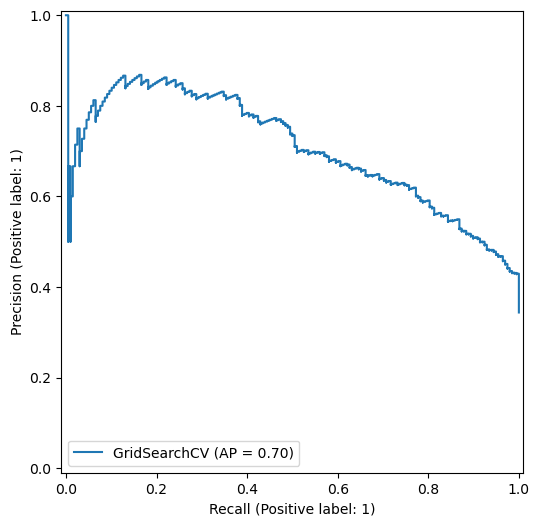

In [107]:
PrecisionRecallDisplay.from_estimator(grid_model, X_train_scaled, y_train)

In [108]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:, 1])

0.7039749907641873

In [109]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:, 1])

In [110]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls)) #buda formülü aslında f1 skorun formülü
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.48646450022029036

In [111]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [112]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[76 19]
 [12 37]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        95
           1       0.66      0.76      0.70        49

    accuracy                           0.78       144
   macro avg       0.76      0.78      0.77       144
weighted avg       0.79      0.78      0.79       144



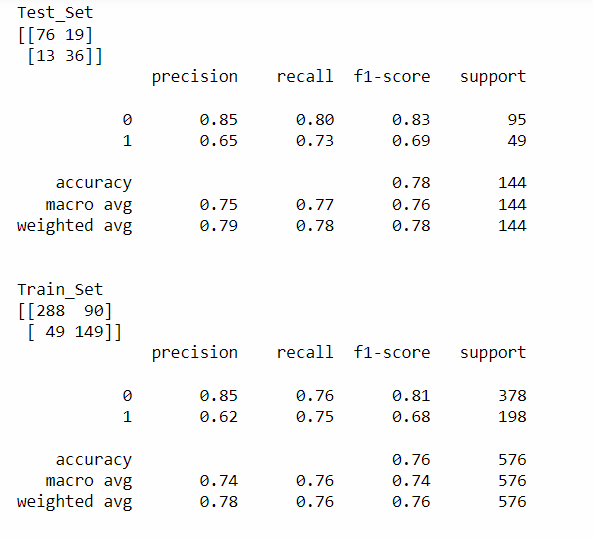